In [2]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

from sympy import Symbol
from sympy.solvers import solve

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.linewidth': 6
             }
plt.rcParams.update(parameters)

# We could also try with the colours:
#plt.rcParams['lines.color'] = 'r' # maybe here with more colours if needed?

In [8]:
def deriv(state, t, *params):
    N, A = state
    r, K, E, w, b, p = params
    PI = lambda n: p*b*n - C # profit
    dN_dt = (r*(1 - N/K) - E)*N 
    dA_dt = w*PI(N)/C
    return np.array([dN_dt, dA_dt])

In [11]:
r, K, E, w, b, p, C = 1.3, 7000, 1.1, 0.5, 0.002, 30, 20
Nstar = lambda e : K*(1- e/r)

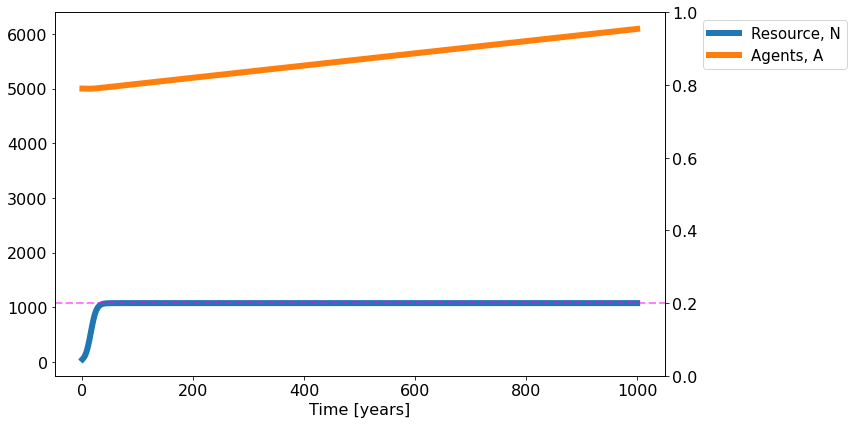

In [23]:
init_state = [50, 5000]
t = np.linspace(0, 1000, 10000)

params = (r, K, E, w, b, p )
sol = odeint(deriv, init_state, t, params).T
N, A = sol

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax2 = ax1.twinx()
# ax1.grid()

ax1.plot(t, N, label="Resource, N")
ax1.axhline(Nstar(E), alpha=0.5, linestyle="--", color="magenta", linewidth=2, )
ax1.plot(t, A, label="Agents, A")

#ax1.set_ylabel('Resources [FILL]')
#ax2.set_ylabel('Agents [FILL]', color = 'mediumseagreen') 
ax1.set_xlabel('Time [years]') 

ax1.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.5, fontsize=15) 